In [1]:
#importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import  cv2
import pickle
import os
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# defining the path for dataset
path = "data" 
labelFile = 'labels.csv' 
batch_size_val=32 
epochs_val=15
imageDimesions = (32,32,3)
testRatio = 0.15    
validationRatio = 0.15 

In [3]:
# preprocessing
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")


for x in range (0,len(myList)):
    
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    if count==noOfClasses-1:
        print(count)
        break
    print(count, end ="->")
    count +=1


print("Done Importing classes")

Total Classes Detected: 43
Importing Classes.....
0->1->2->3->4->5->6->7->8->9->10->11->12->13->14->15->16->17->18->19->20->21->22->23->24->25->26->27->28->29->30->31->32->33->34->35->36->37->38->39->40->41->42
 


In [4]:
images = np.array(images)
classNo = np.array(classNo)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [6]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(25142, 32, 32, 3) (25142,)
Validation(4437, 32, 32, 3) (4437,)
Test(5220, 32, 32, 3) (5220,)


In [7]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))
 
num_of_samples = []
cols = 5
num_classes = noOfClasses

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


In [8]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255            
    return img

In [9]:
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [10]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [11]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  

In [12]:
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)

In [13]:
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)


In [14]:
def Model():
    model= Sequential()
    model.add((Conv2D(30,(5,5),input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(30, (5,5), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add((Conv2D(15, (3,3),activation='relu')))
    model.add((Conv2D(15, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax')) 
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [15]:
model = Model()
print(model.summary())
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

C:\Users\gurut\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 30)          │          22,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 15)            │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         120,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,458 (669.76 KB)

 Trainable params: 171,458 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
  1/785 ━━━━━━━━━━━━━━━━━━━━ 1:02:19 5s/step - accuracy: 0.0312 - loss: 3.7488

C:\Users\gurut\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


785/785 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.1658 - loss: 3.0718 - val_accuracy: 0.7530 - val_loss: 0.8767
Epoch 2/15
  1/785 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5000 - loss: 1.7065

C:\Users\gurut\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5000 - loss: 0.8543 - val_accuracy: 0.7422 - val_loss: 0.8821
Epoch 3/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.5342 - loss: 1.4988 - val_accuracy: 0.8706 - val_loss: 0.4468
Epoch 4/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5938 - loss: 0.5166 - val_accuracy: 0.8675 - val_loss: 0.4490
Epoch 5/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.6607 - loss: 1.1062 - val_accuracy: 0.9139 - val_loss: 0.3025
Epoch 6/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 0.4894 - val_accuracy: 0.9177 - val_loss: 0.3005
Epoch 7/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7319 - loss: 0.8703 - val_accuracy: 0.9466 - val_loss: 0.2051
Epoch 8/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 0.4165 - val_accuracy: 0.9416 - val_loss: 0.2218
Epoch 9/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7619 - loss: 0.7570 - val_accuracy: 0.954

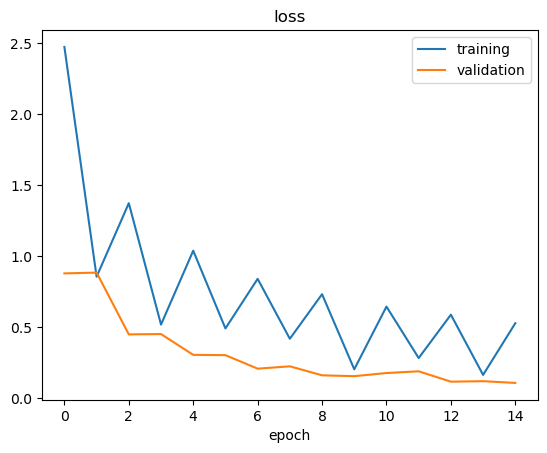

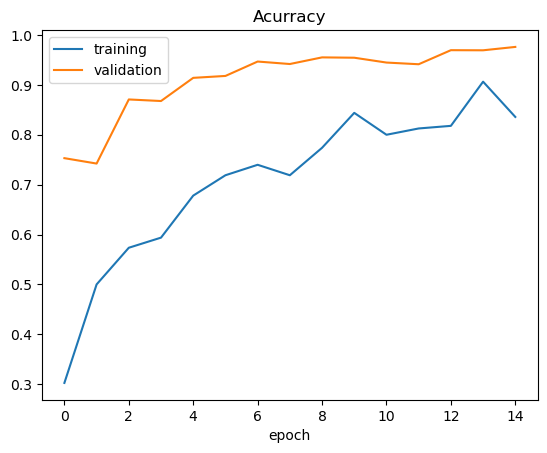

In [16]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

In [17]:
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.09879271686077118
Test Accuracy: 0.977011501789093


In [18]:
score =model.evaluate(X_validation,y_validation,verbose=0)
print('Validation Score:',score[0])
print('Validation Accuracy:',score[1])

Validation Score: 0.10477863997220993
Validation Accuracy: 0.9758846163749695


In [19]:
score = model.evaluate(X_train,y_train,verbose=0)
print('Train Score:',score[0])
print('Train Accuracy:',score[1])

Train Score: 0.09546706080436707
Train Accuracy: 0.9784424304962158


In [20]:
model.save("trafficsignrecognition.h5")